In [27]:
# libraries
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ydata_profiling as pp
import seaborn as sns

In [3]:
# reading the csv
df1 = pd.read_csv('Data/lung_cancer_one.csv')

In [3]:
# visualizing the file
df1.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [6]:
# creating a report for a overview of the data
pp.ProfileReport(df1)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

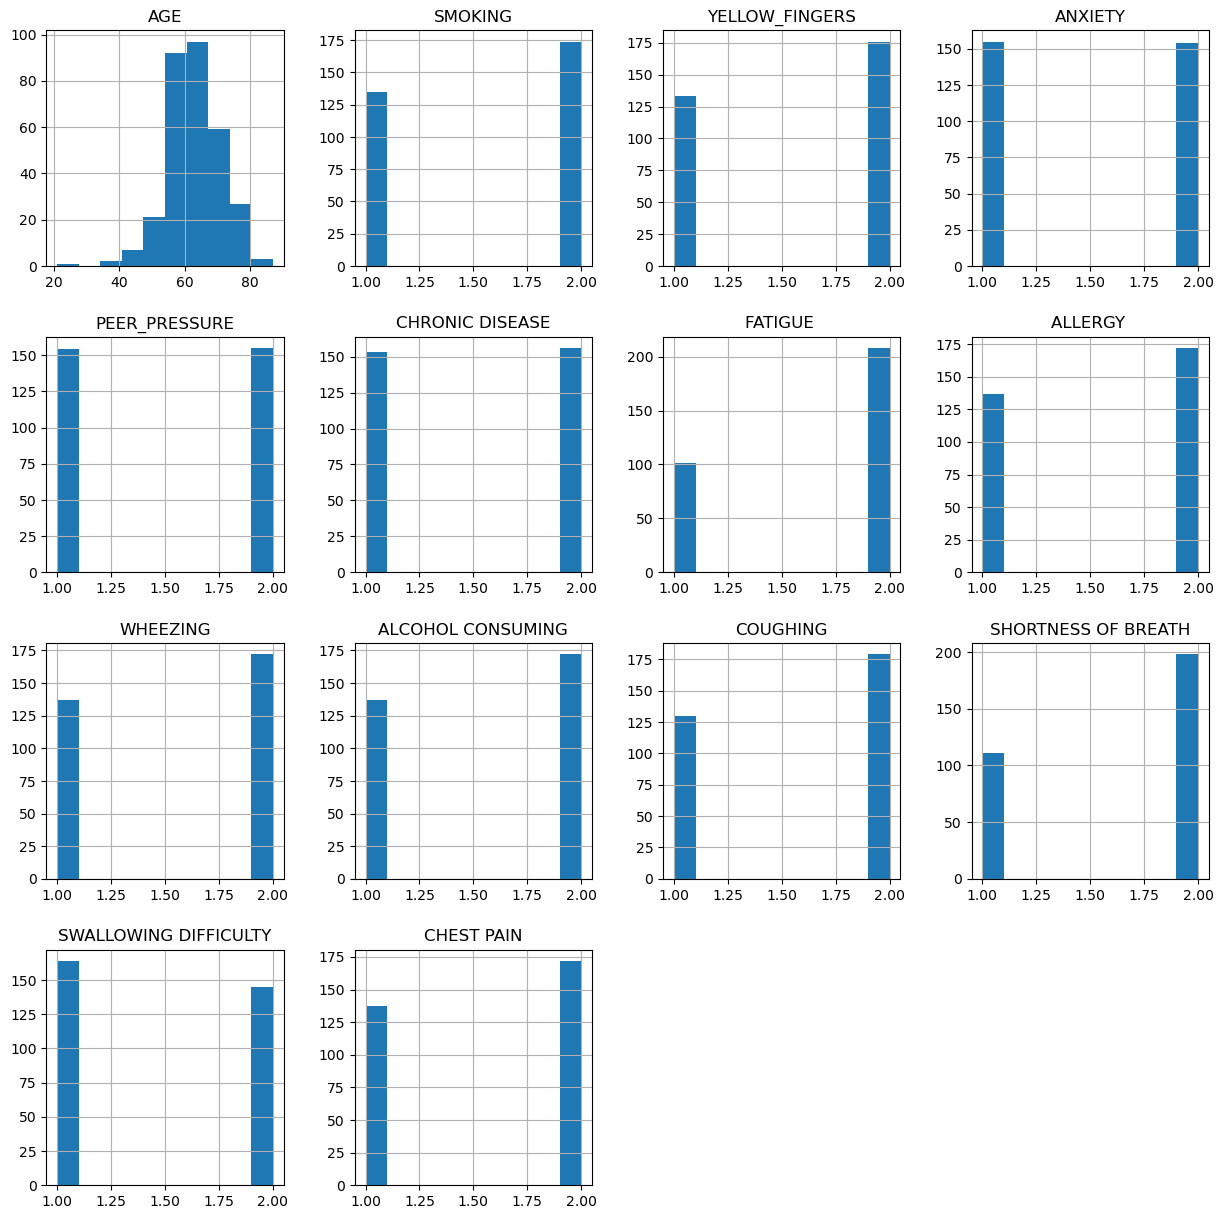

In [12]:
# histogram with data distribution
df1.hist(figsize = (15,15))
plt.show()

 - The distribution of age is mostly between 45-80 years
 - Age is the only variable that is not a binary
 - Almost all of the variables have a balanced distribution
 - Fatigue and shortness of breath have most of their values as the number 2 (which means they have those symptoms)
 - Swallowing difficulty and is the only variable where most of the patients did not have that symptom

In [24]:
# central tendency values for the variables
age = df1['AGE']
age.head().describe().transpose()

# AGE is the only variable that is not 1 or 2
# counting the ages
age.value_counts()

64    20
63    19
56    19
62    18
60    17
61    16
59    15
70    15
67    13
58    13
69    11
55    11
72    10
71    10
68     9
57     9
77     9
51     8
54     8
65     7
74     6
75     5
76     4
52     4
53     4
73     4
47     4
66     4
49     3
81     2
78     2
44     2
48     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: AGE, dtype: int64

<Axes: >

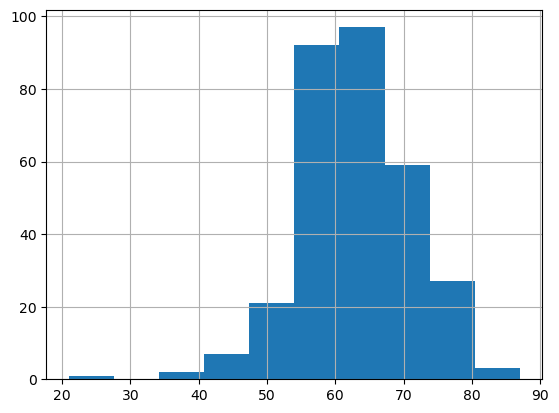

In [25]:
# histogram for age alone to better see it 
age.hist()

In [4]:
# counting how many varaibles there are in the dataframe
df1.count()

GENDER                   309
AGE                      309
SMOKING                  309
YELLOW_FINGERS           309
ANXIETY                  309
PEER_PRESSURE            309
CHRONIC DISEASE          309
FATIGUE                  309
ALLERGY                  309
WHEEZING                 309
ALCOHOL CONSUMING        309
COUGHING                 309
SHORTNESS OF BREATH      309
SWALLOWING DIFFICULTY    309
CHEST PAIN               309
LUNG_CANCER              309
dtype: int64

In [11]:
# Looking at the Lung Cancer variable, let's have a look how many have and how many don't have lung cancer
count_f = 0
count_t = 0
for x in df1['LUNG_CANCER']:
    if x == 'YES':
        count_t = count_t + 1
    else:
        count_f = count_f + 1

print(f'True counts: {count_t}')
print(f'False counts: {count_f}')

# percentages
perc_t = (count_t/ (count_t + count_f)) * 100
perc_f = (count_f/ (count_t + count_f)) * 100
print()
print(f'{perc_t:.2f}% have lung cancer and {perc_f:.2f}% dont')

True counts: 270
False counts: 39

87.38% have lung cancer and 12.62% dont


Seeing that 87% of the sample have Lung Cancer, depending on the result we have on the analysis, it could be mistaken because of the large amount of cases with cancer. It would be hard to tell a conclusive result of what parameter can cause more lung cancer.

In [43]:
# droping the gender column
df_coor_matrix = df1.drop(['GENDER'], axis = 1)

# substituting yes and no for 0 and 1
LUNG_CANCER = {'YES': 1, 'NO' : 0}

df_coor_matrix.LUNG_CANCER = [LUNG_CANCER[item] for item in df_coor_matrix.LUNG_CANCER]

df_coor_matrix.head(50)

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


[Text(0.5, 0, 'AGE'),
 Text(1.5, 0, 'SMOKING'),
 Text(2.5, 0, 'YELLOW_FINGERS'),
 Text(3.5, 0, 'ANXIETY'),
 Text(4.5, 0, 'PEER_PRESSURE'),
 Text(5.5, 0, 'CHRONIC DISEASE'),
 Text(6.5, 0, 'FATIGUE '),
 Text(7.5, 0, 'ALLERGY '),
 Text(8.5, 0, 'WHEEZING'),
 Text(9.5, 0, 'ALCOHOL CONSUMING'),
 Text(10.5, 0, 'COUGHING'),
 Text(11.5, 0, 'SHORTNESS OF BREATH'),
 Text(12.5, 0, 'SWALLOWING DIFFICULTY'),
 Text(13.5, 0, 'CHEST PAIN'),
 Text(14.5, 0, 'LUNG_CANCER')]

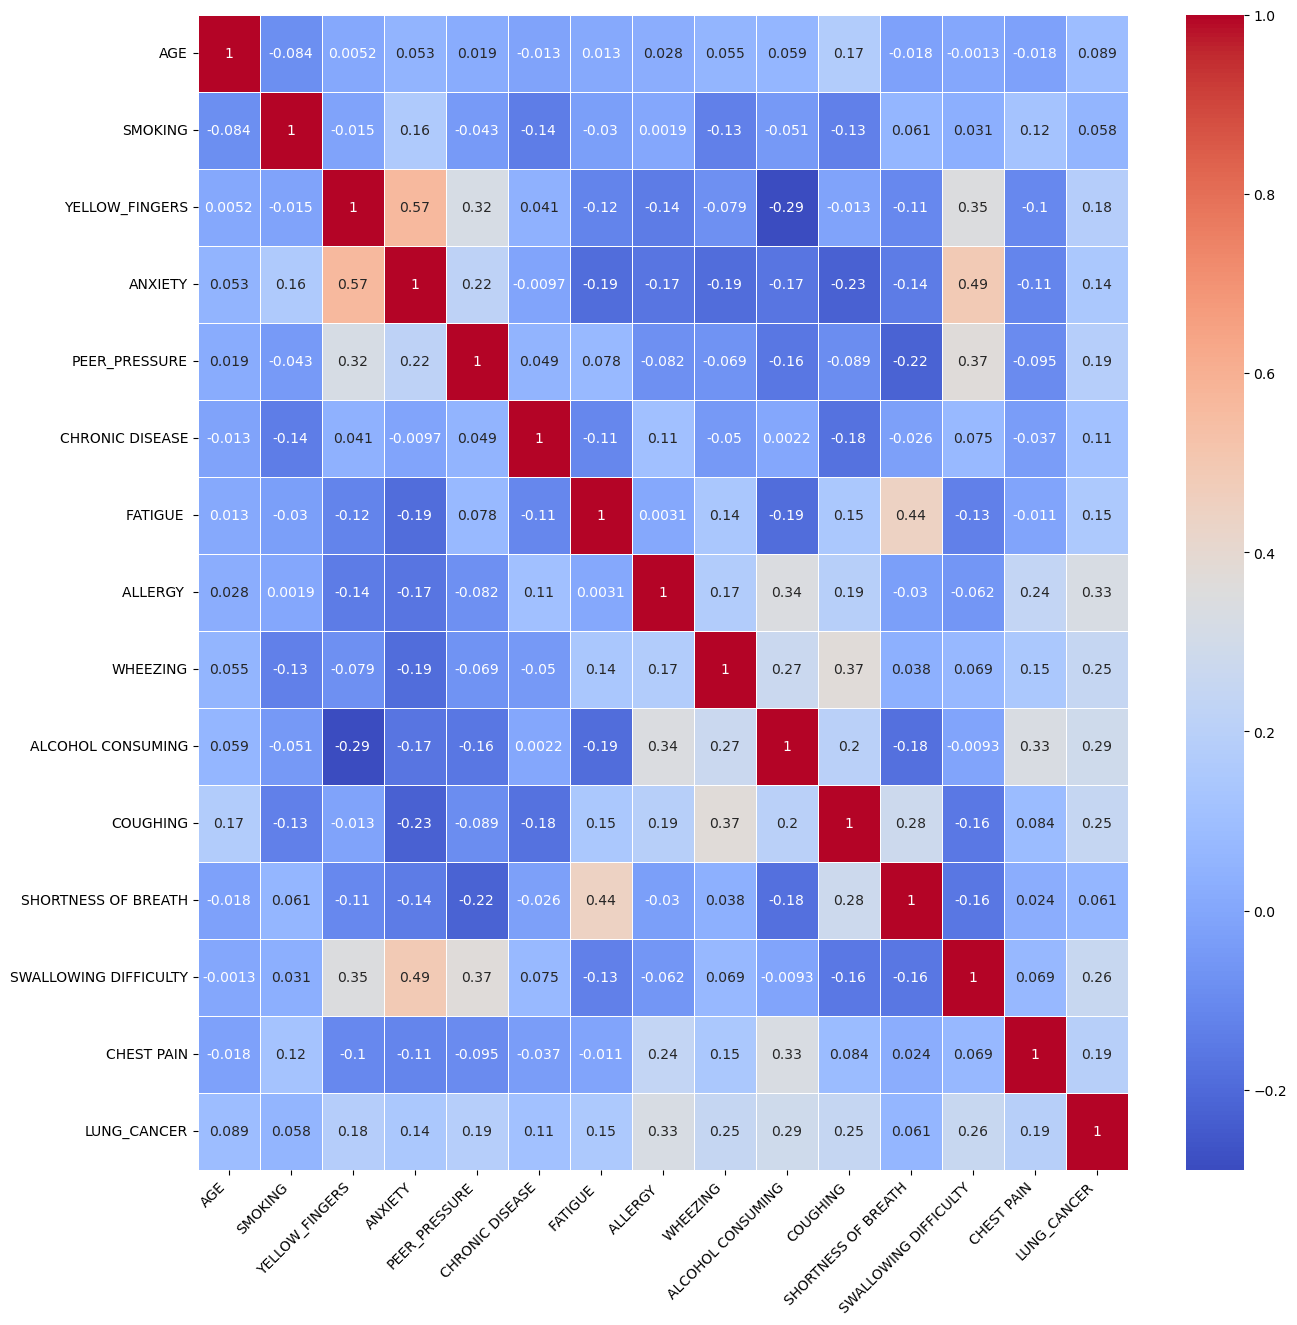

In [69]:
# creating a correlation matrix for the dataframe
plt.figure(figsize = (15,15))
corr_m = sns.heatmap(df_coor_matrix.corr(), annot = True, linewidth = .5, cmap = 'coolwarm')
corr_m.set_xticklabels(corr_m.get_xticklabels(), rotation=45, horizontalalignment='right')

## NEED TO INTERPRET THIS MATRIX BETTER